### Tanmay Bhatt
### 011499072
CMPE 258 <br />
Assignmnt - 4 <br />
Date: 03/23/2018 <br />

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
from numpy.random import uniform, seed
tf.set_random_seed(10)

## Best accuracy achieved with dropout (keep-prob) = 0.7 and learning rate - 0.04

dropout(keep) probability :  0.7<br />
    
Final cost is :  1.4660227<br />

Train accuracy :  99.62%<br />
Test accuracy :  94.93% <br />

## 1. (40pts) Define functions
You may need to define the following functions.
One-hot encoding
Create placeholders
initialize parameters using xavier initializer
forward propagation with dropout regularization
compute cost

In [2]:
def placeholder_initializer():
    X = tf.placeholder(shape=(None, input_neurons), dtype=tf.float32) 
    Y = tf.placeholder(shape=(None, output_neurons), dtype=tf.float32)
    dropout_probaility = tf.placeholder("float")
    return X,Y,dropout_probaility

In [3]:
def parameters_initializer():
    W1 = tf.get_variable("W1",shape=(X_train.shape[1],hidden1_neurons),dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer())
    W2 = tf.get_variable("W2",shape=(hidden1_neurons,hidden2_neurons),dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer())
    W3 = tf.get_variable("W3",shape=(hidden2_neurons,output_neurons),dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer())

    B1 = tf.get_variable("B1",shape=(hidden1_neurons),initializer=tf.zeros_initializer(),dtype=tf.float32)
    B2 = tf.get_variable("B2",shape=(hidden2_neurons),initializer=tf.zeros_initializer(),dtype=tf.float32)
    B3 = tf.get_variable("B3",shape=(output_neurons),initializer=tf.zeros_initializer(),dtype=tf.float32)
    
    
    return W1,W2,W3,B1,B2,B3

In [4]:
def forward_pass(dropout_prob):
    global neural_dict
    
    z1 = tf.add(tf.matmul(X, neural_dict['W1']), neural_dict['B1'])
    a1 = tf.nn.relu(z1)
    a1 = tf.nn.dropout(a1, dropout_prob)
    z2 = tf.add(tf.matmul(a1, neural_dict['W2']), neural_dict['B2'])
    a2 = tf.nn.relu(z2)
    a2 = tf.nn.dropout(a2, dropout_prob)
    z3 = tf.add(tf.matmul(a2, neural_dict['W3']), neural_dict['B3'])
    a3 = tf.nn.sigmoid(z3)

    return a3

In [5]:
def one_hot_encoding(mat):
    list_of_list = []
    for i in range(0,len(mat)):
        small_list = np.zeros(np.max(mat)+1)
        small_list[mat[i]] = 1
        list_of_list.append(small_list)
    result = np.array(list_of_list)
    return result

## 2. Split data
Please split each data (Train & Test) set as input (x) and output (y) set.
Input set is the columns starting 0 to 399.
Output set is the column of ‘y’.

In [6]:
train_data = pd.read_csv("./ex4_train.csv", index_col=0)
test_data = pd.read_csv("./ex4_test.csv", index_col=0)

X_train = np.asarray(train_data.iloc[:,:(train_data.shape[1] -1 )])
X_test =  np.asarray(test_data.iloc[:,:(test_data.shape[1] -1 )])

Y_train = np.asarray(train_data['y'])
Y_test =np.asarray(test_data['y'])

Y_train = Y_train.tolist()
Y_test = Y_test.tolist()

## 3. Define number of neurons in each layer

In [7]:
input_neurons = X_train.shape[1]
hidden1_neurons = 200
hidden2_neurons = 100
output_neurons = 10

## 4. (30pts) Neural Network model with 2 hidden layers
Please build neural network model using input layer (400 neurons), 2 hidden layers, and output layer (10 neurons) using training data set.
In tensorflow, you do not need to define backpropagation.
Create placeholders
Initialize parameters using xavier initializer
Forward propagation with dropout regularization
Compute cost
Optimizer using Adam optimizer
Update parameters

#### Initializing Weights with Xavier initializer and Biases with zeros.

In [8]:
neural_dict = dict.fromkeys(['W1','W2','W3','B1','B2','B3'])

In [9]:
neural_dict['W1'],neural_dict['W2'],neural_dict['W3'],neural_dict['B1'],neural_dict['B2'],neural_dict['B3'] = parameters_initializer()

Instructions for updating:
Use the retry module or similar alternatives.


In [10]:
X,Y, dropout_prob = placeholder_initializer()

In [11]:
print(neural_dict['W1'])
print(neural_dict['W2'])
print(neural_dict['W3'])
print(neural_dict['B1'])
print(neural_dict['B2'])
print(neural_dict['B3'])
print(X)
print(Y)
print(dropout_prob)

<tf.Variable 'W1:0' shape=(400, 200) dtype=float32_ref>
<tf.Variable 'W2:0' shape=(200, 100) dtype=float32_ref>
<tf.Variable 'W3:0' shape=(100, 10) dtype=float32_ref>
<tf.Variable 'B1:0' shape=(200,) dtype=float32_ref>
<tf.Variable 'B2:0' shape=(100,) dtype=float32_ref>
<tf.Variable 'B3:0' shape=(10,) dtype=float32_ref>
Tensor("Placeholder:0", shape=(?, 400), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)
Tensor("Placeholder_2:0", dtype=float32)


In [12]:
Y_train_one_hot = one_hot_encoding(Y_train)
Y_test_one_hot = one_hot_encoding(Y_test)

In [13]:
plot_object = {}

In [14]:
dropout_probabilities = [0.3,0.7,0.9,1]
rate = 0.004
iterations = 500

In [15]:
forward_result = forward_pass(dropout_prob)
cost = tf.losses.softmax_cross_entropy(Y, forward_result)

optimizer = tf.train.AdamOptimizer(learning_rate=rate).minimize(cost)

accuracy = tf.metrics.accuracy(tf.argmax(Y, 1),tf.argmax(forward_pass(dropout_prob), 1))

init = tf.global_variables_initializer()

## 5. (10pts) Predictions
Please predict digit using softmax function based the optimized parameters.
Please calculate accuracy for the prediction using training data set and testing data set.

In [16]:
for dropout in dropout_probabilities:
    count = 0
    print("dropout probability : ",dropout)
    print ("")
    with tf.Session() as sess:
        sess.run(init)
        while count < iterations:
            result = sess.run((optimizer, cost), feed_dict = {X: X_train, Y: Y_train_one_hot, dropout_prob: dropout})
            count +=1
            if count % 100 == 0:
                print ("At Iteration : %d Cost is %f" % (count,result[1]))

        print ("")
        print("Final cost is : ", result[1])      

        train_prediction = np.argmax(sess.run(forward_result, feed_dict = {X: X_train, Y: Y_train_one_hot, dropout_prob: 1.0}),1)
        test_prediction = np.argmax(sess.run(forward_result, feed_dict = {X: X_test, Y: Y_test_one_hot, dropout_prob: 1.0}),1)

        Y_train_labels = np.argmax(Y_train_one_hot,1)
        Y_test_labels = np.argmax(Y_test_one_hot,1)
        train_accuracy = sess.run(tf.reduce_mean(tf.cast(sess.run(tf.equal(train_prediction,Y_train_labels)), tf.float32)))
        test_accuracy = sess.run(tf.reduce_mean(tf.cast(sess.run(tf.equal(test_prediction,Y_test_labels)), tf.float32)))

        print ("")
        print("Train accuracy : ", train_accuracy)
        print("Test accuracy : ", test_accuracy)

        plot_object[dropout] = {}
        plot_object[dropout]['cost'] = result[1]
        plot_object[dropout]['train_accuracy'] = train_accuracy
        plot_object[dropout]['test_accuracy'] = test_accuracy

        print ("")
        print ("**********")
        print ("")
        sess.close()


dropout probability :  0.3

At Iteration : 100 Cost is 1.558365
At Iteration : 200 Cost is 1.516962
At Iteration : 300 Cost is 1.503135
At Iteration : 400 Cost is 1.493450
At Iteration : 500 Cost is 1.488309

Final cost is :  1.4883093

Train accuracy :  0.99114287
Test accuracy :  0.9393333

**********

dropout probability :  0.7

At Iteration : 100 Cost is 1.492669
At Iteration : 200 Cost is 1.473863
At Iteration : 300 Cost is 1.468959
At Iteration : 400 Cost is 1.466908
At Iteration : 500 Cost is 1.466023

Final cost is :  1.4660227

Train accuracy :  0.99628574
Test accuracy :  0.9493333

**********

dropout probability :  0.9

At Iteration : 100 Cost is 1.485363
At Iteration : 200 Cost is 1.471656
At Iteration : 300 Cost is 1.467772
At Iteration : 400 Cost is 1.466899
At Iteration : 500 Cost is 1.466508

Final cost is :  1.4665084

Train accuracy :  0.99457145
Test accuracy :  0.94733334

**********

dropout probability :  1

At Iteration : 100 Cost is 1.482555
At Iteration : 200 

## 6. (20pts) Optimization
Please optimize your model using various probability in drop out.

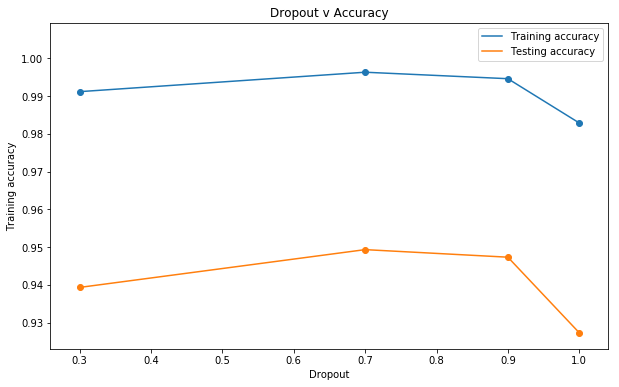

In [19]:
train = []
test = []
keys = []
plt.figure(figsize=(10,6))
plt.xlabel('Dropout')
plt.ylabel('Training accuracy')
plt.title("Dropout v Accuracy")
for key, value in plot_object.items():
    keys.append(key)
    train.append(plot_object[key]['train_accuracy'])
    test.append(plot_object[key]['test_accuracy'])
plt.scatter(keys,train)
plt.scatter(keys,test)
plt.plot(keys,train,label='Training accuracy')
plt.plot(keys,test,label='Testing accuracy')
plt.legend()
plt.show()